# **ShyWay Airlines: Business Problem**

#### **Objective**
Shyway Airlines is experiencing a rise in customer dissatisfaction and churn. In a highly competitive airline market, retaining customers is critical to revenue and brand reputation. 

# **Columns Details**                                          

#   Customer details

1. **Customer_ID**: Unique identifier for each customer.
2. **Age**: The customer's age.
3. **Gender**: The customer's gender (e.g., Male, Female).
4. **Phone No**: The customer's contact phone number.
5. **Email**: The customer's email address.
6. **Location**: The country where the customer is located.
7. **Date**: The date of booking or customer activity.
8. **Flight ID**: Unique identifier for each flight (airline code + flight number).
9. **Preferred_Travel_Class**: The customer's preferred class of travel (e.g., Economy, Business, First).
10. **Booking_Channel**: The method used for booking (e.g., Online, Phone, Agent).
11. **Destination_Type**: Whether the flight is domestic or international.
12. **Booking_Frequency**: The number of bookings made by the customer.
13. **Distance**: The distance of the flight in miles.
14. **Miles_Accrued**: The number of frequent flyer miles accumulated by the customer.
15. **Loyalty_Tier**: The customer's loyalty status with the airline (e.g., Gold, Silver).
16. **Flight_Cancellations**: The number of flight cancellations for the customer.


# Revenue details

17. **Price_of_Ticket**: The total price of the flight ticket.
18. **Tenure**: The number of years the customer has been with the airline.
19. **Revenue_Contribution**: The total revenue generated by the customer.
20. **Ancillary_Purchases**: Additional purchases made by the customer (e.g., baggage, seat selection).
21. **Discount_Usage**: The number of discounts the customer has used.
22. **Offer**: The type of offer the customer has received (e.g., Free Upgrade, Discount).


# service details

23. **Inflight wifi service**: The customer's rating of the inflight Wi-Fi service.
24. **Departure/Arrival time convenient**: The customer's rating of flight timing convenience.
25. **Ease of Online booking**: The customer's rating of the online booking process.
26. **Food and drink**: The customer's rating of inflight food and drink quality.
27. **Online boarding**: The customer's rating of the online boarding process.
28. **Seat comfort**: The customer's rating of seat comfort.
29. **Inflight entertainment**: The customer's rating of inflight entertainment options.
30. **On-board service**: The customer's rating of on-board service (flight attendants, etc.).
31. **Leg room service**: The customer's rating of legroom during the flight.
32. **Baggage handling**: The customer's rating of baggage handling efficiency.
33. **Checkin service**: The customer's rating of the check-in process.
34. **Inflight service**: The customer's rating of overall inflight service.
35. **AVG_INTERVAL time**: The average time between the customer’s flights.
36. **Cleanliness**: The customer's rating of cleanliness during the flight.
37. **Departure Delay in Minutes**: The delay in minutes for the flight's departure.
38. **Arrival Delay in Minutes**: The delay in minutes for the flight’s arrival.
39. **Complaints_Frequency**: How often the customer has filed complaints.
40. **NPS**: Net Promoter Score, indicating the likelihood of the customer recommending the airline.
41. **Recency**: The time since the customer’s last flight or booking..

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sn 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Accessing the Datasets

In [2]:
airline_data = pd.read_csv("airline-customer-data.csv")

# Exploring the dataset

In [3]:
airline_data.shape

(5000, 41)

In [4]:
airline_data.columns

Index(['Customer_ID', 'Age', 'Gender', 'Phone No', 'Email', 'Location', 'Date',
       'Flight ID', 'Preferred_Travel_Class', 'Booking_Channel',
       'Destination_Type', 'Booking_Frequency', 'Distance', 'Miles_Accrued',
       'Loyalty_Tier', 'Flight_Cancellations', 'Price_of_Ticket', 'Tenure',
       'Revenue_Contribution', 'Ancillary_Purchases', 'Discount_Usage',
       'Offer', 'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'AVG_INTERVAL time', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Complaints_Frequency', 'NPS', 'Recency'],
      dtype='object')

In [5]:
airline_data.head()

,Customer_ID,Age,Gender,Phone No,Email,Location,Date,Flight ID,Preferred_Travel_Class,Booking_Channel,...,Baggage handling,Checkin service,Inflight service,AVG_INTERVAL time,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Complaints_Frequency,NPS,Recency
0,1,31,Male,(927)709-0811,shelly86@example.org,Germany,07-08-2024,GE3063,Economy,Online,...,1.0,3.0,4.0,16,1,36,22,1,4,17
1,2,74,Female,001-865-390-9692,vward@example.org,India,22-09-2024,IN6370,First Class,Phone,...,5.0,5.0,2.0,26,1,66,89,3,2,202
2,3,54,Male,5102652665,amy61@example.net,Canada,11-10-2024,CA5613,Business,Agent,...,3.0,5.0,3.0,11,4,103,12,1,9,324
3,4,62,Female,944-526-6187,brittany85@example.org,Australia,16-11-2024,AU2767,Economy,Online,...,1.0,3.0,4.0,30,5,30,52,1,2,99
4,5,34,Female,424.628.6873x42487,nmorales@example.com,France,13-04-2024,FR2304,Economy,Phone,...,4.0,3.0,3.0,16,1,11,50,0,8,289


# **Exploratory Data Analysis (EDA)**

# 1. Descriptive Analysis

### Check Dtype

In [6]:
airline_data.dtypes

Customer_ID                            int64
Age                                    int64
Gender                                object
Phone No                              object
Email                                 object
Location                              object
Date                                  object
Flight ID                             object
Preferred_Travel_Class                object
Booking_Channel                       object
Destination_Type                      object
Booking_Frequency                      int64
Distance                               int64
Miles_Accrued                          int64
Loyalty_Tier                          object
Flight_Cancellations                   int64
Price_of_Ticket                      float64
Tenure                                 int64
Revenue_Contribution                 float64
Ancillary_Purchases                    int64
Discount_Usage                         int64
Offer                                 object
Inflight w

# drop irrelevant columns of by the dataset information

In [7]:
airline_data= airline_data.drop(columns=['Phone No','Email','Location', 'Date',
       'Flight ID'])

In [8]:
airline_data.shape

(5000, 36)

### Describe

In [9]:
airline_data.describe()

,Customer_ID,Age,Booking_Frequency,Distance,Miles_Accrued,Flight_Cancellations,Price_of_Ticket,Tenure,Revenue_Contribution,Ancillary_Purchases,...,Baggage handling,Checkin service,Inflight service,AVG_INTERVAL time,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Complaints_Frequency,NPS,Recency
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,4985.000000,4979.000000,4990.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,49.252000,5.532400,4967.597000,2750.590000,2.499800,1063.688482,5.359000,5728.289706,2.516800,...,3.012638,3.010243,3.006814,15.375600,3.014000,60.637200,60.360000,2.50240,5.498400,181.261600
std,1443.520003,18.070866,2.844392,2849.360314,2294.464775,1.703461,545.602255,2.860447,4543.963100,1.694312,...,1.411672,1.408126,1.430544,8.613139,1.422184,34.663178,35.259465,1.70252,2.862453,104.999406
min,1.000000,18.000000,1.000000,51.000000,6.000000,0.000000,100.150000,1.000000,103.330000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,1250.750000,34.000000,3.000000,2514.750000,874.750000,1.000000,596.465000,3.000000,1905.030000,1.000000,...,2.000000,2.000000,2.000000,8.000000,2.000000,30.000000,29.000000,1.00000,3.000000,89.000000
50%,2500.500000,49.000000,6.000000,4885.500000,2067.000000,3.000000,1075.370000,5.000000,4486.340000,2.000000,...,3.000000,3.000000,3.000000,15.000000,3.000000,61.000000,60.000000,3.00000,6.000000,180.500000
75%,3750.250000,65.000000,8.000000,7427.750000,4096.000000,4.000000,1532.775000,8.000000,8722.910000,4.000000,...,4.000000,4.000000,4.000000,23.000000,4.000000,90.000000,91.000000,4.00000,8.000000,273.000000
max,5000.000000,80.000000,10.000000,10000.000000,9994.000000,5.000000,1999.750000,10.000000,19980.200000,5.000000,...,5.000000,5.000000,5.000000,30.000000,5.000000,120.000000,120.000000,5.00000,10.000000,365.000000


### Describe numeric columns && categorical columns

In [10]:
# Separate numeric columns
Numeric = airline_data.select_dtypes(include=[np.number]).columns

# Separate categorical columns
Categorical = airline_data.select_dtypes(exclude=[np.number]).columns

In [11]:
airline_data[Numeric].columns

Index(['Customer_ID', 'Age', 'Booking_Frequency', 'Distance', 'Miles_Accrued',
       'Flight_Cancellations', 'Price_of_Ticket', 'Tenure',
       'Revenue_Contribution', 'Ancillary_Purchases', 'Discount_Usage',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'AVG_INTERVAL time', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Complaints_Frequency', 'NPS', 'Recency'],
      dtype='object')

In [12]:
airline_data[Numeric].describe()

,Customer_ID,Age,Booking_Frequency,Distance,Miles_Accrued,Flight_Cancellations,Price_of_Ticket,Tenure,Revenue_Contribution,Ancillary_Purchases,...,Baggage handling,Checkin service,Inflight service,AVG_INTERVAL time,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Complaints_Frequency,NPS,Recency
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,4985.000000,4979.000000,4990.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,49.252000,5.532400,4967.597000,2750.590000,2.499800,1063.688482,5.359000,5728.289706,2.516800,...,3.012638,3.010243,3.006814,15.375600,3.014000,60.637200,60.360000,2.50240,5.498400,181.261600
std,1443.520003,18.070866,2.844392,2849.360314,2294.464775,1.703461,545.602255,2.860447,4543.963100,1.694312,...,1.411672,1.408126,1.430544,8.613139,1.422184,34.663178,35.259465,1.70252,2.862453,104.999406
min,1.000000,18.000000,1.000000,51.000000,6.000000,0.000000,100.150000,1.000000,103.330000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,1250.750000,34.000000,3.000000,2514.750000,874.750000,1.000000,596.465000,3.000000,1905.030000,1.000000,...,2.000000,2.000000,2.000000,8.000000,2.000000,30.000000,29.000000,1.00000,3.000000,89.000000
50%,2500.500000,49.000000,6.000000,4885.500000,2067.000000,3.000000,1075.370000,5.000000,4486.340000,2.000000,...,3.000000,3.000000,3.000000,15.000000,3.000000,61.000000,60.000000,3.00000,6.000000,180.500000
75%,3750.250000,65.000000,8.000000,7427.750000,4096.000000,4.000000,1532.775000,8.000000,8722.910000,4.000000,...,4.000000,4.000000,4.000000,23.000000,4.000000,90.000000,91.000000,4.00000,8.000000,273.000000
max,5000.000000,80.000000,10.000000,10000.000000,9994.000000,5.000000,1999.750000,10.000000,19980.200000,5.000000,...,5.000000,5.000000,5.000000,30.000000,5.000000,120.000000,120.000000,5.00000,10.000000,365.000000


In [13]:
airline_data[Categorical].columns

Index(['Gender', 'Preferred_Travel_Class', 'Booking_Channel',
       'Destination_Type', 'Loyalty_Tier', 'Offer'],
      dtype='object')

In [14]:
airline_data[Categorical].describe()

,Gender,Preferred_Travel_Class,Booking_Channel,Destination_Type,Loyalty_Tier,Offer
count,5000,5000,5000,5000,5000,5000
unique,2,3,4,2,4,4
top,Female,First Class,Agent,International,Bronze,Discount
freq,2562,1695,1269,2509,1260,1269


# examine missing values

In [15]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer_ID                        5000 non-null   int64  
 1   Age                                5000 non-null   int64  
 2   Gender                             5000 non-null   object 
 3   Preferred_Travel_Class             5000 non-null   object 
 4   Booking_Channel                    5000 non-null   object 
 5   Destination_Type                   5000 non-null   object 
 6   Booking_Frequency                  5000 non-null   int64  
 7   Distance                           5000 non-null   int64  
 8   Miles_Accrued                      5000 non-null   int64  
 9   Loyalty_Tier                       5000 non-null   object 
 10  Flight_Cancellations               5000 non-null   int64  
 11  Price_of_Ticket                    5000 non-null   float

In [16]:
# airline_data['Loyalty_Tier']

In [17]:
airline_data.isnull().sum()

Customer_ID                           0
Age                                   0
Gender                                0
Preferred_Travel_Class                0
Booking_Channel                       0
Destination_Type                      0
Booking_Frequency                     0
Distance                              0
Miles_Accrued                         0
Loyalty_Tier                          0
Flight_Cancellations                  0
Price_of_Ticket                       0
Tenure                                0
Revenue_Contribution                  0
Ancillary_Purchases                   0
Discount_Usage                        0
Offer                                 0
Inflight wifi service                 5
Departure/Arrival time convenient    13
Ease of Online booking               16
Food and drink                       26
Online boarding                      14
Seat comfort                         20
Inflight entertainment                7
On-board service                      6


In [18]:
airline_data.shape

(5000, 36)

In [19]:
airline_data.isnull().mean()*100

Customer_ID                          0.00
Age                                  0.00
Gender                               0.00
Preferred_Travel_Class               0.00
Booking_Channel                      0.00
Destination_Type                     0.00
Booking_Frequency                    0.00
Distance                             0.00
Miles_Accrued                        0.00
Loyalty_Tier                         0.00
Flight_Cancellations                 0.00
Price_of_Ticket                      0.00
Tenure                               0.00
Revenue_Contribution                 0.00
Ancillary_Purchases                  0.00
Discount_Usage                       0.00
Offer                                0.00
Inflight wifi service                0.10
Departure/Arrival time convenient    0.26
Ease of Online booking               0.32
Food and drink                       0.52
Online boarding                      0.28
Seat comfort                         0.40
Inflight entertainment            

In [20]:
import missingno as msno # library to examine missing values

<Axes: >

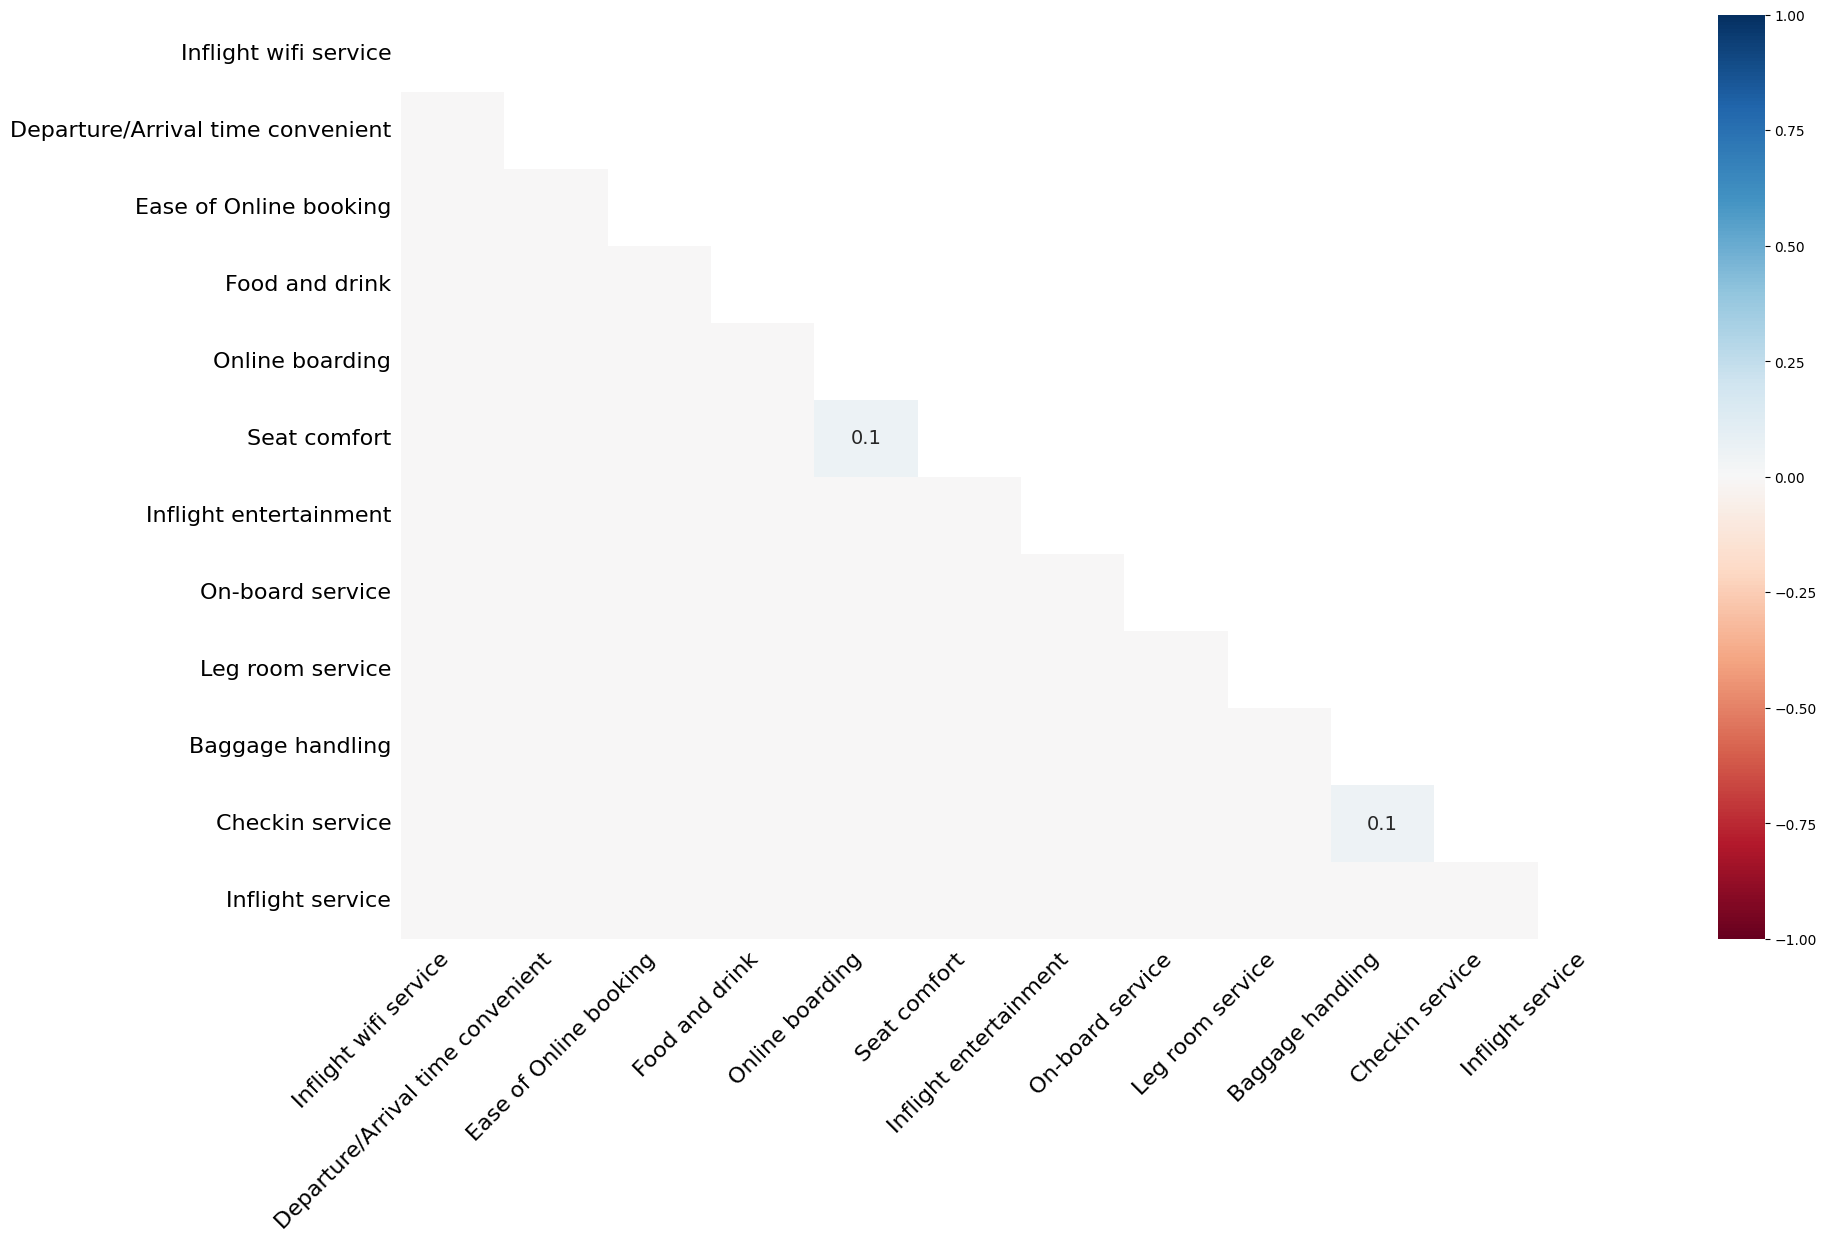

In [21]:
msno.heatmap(airline_data)

In [22]:
columns_to_fill = [
    'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Food and drink', 'Online boarding',
    'Seat comfort', 'Inflight entertainment', 'On-board service',
    'Leg room service', 'Baggage handling', 'Checkin service',
    'Inflight service'
]

# Round the means to integers and create the fill_values dictionary
fill_values = {col: int(round(airline_data[col].mean())) for col in columns_to_fill}

# Fill missing values with the rounded integer means
airline_data.fillna(fill_values, inplace=True)

# Convert the specified columns to integer type
airline_data[columns_to_fill] = airline_data[columns_to_fill].astype(int)


In [23]:
airline_data[columns_to_fill].head()


,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service
0,2,2,1,1,4,1,3,2,3,1,3,4
1,3,5,4,3,3,3,2,4,4,5,5,2
2,4,3,4,4,2,5,3,4,5,3,5,3
3,5,2,5,5,2,3,5,3,3,1,3,4
4,5,3,3,4,4,4,4,4,3,4,3,3


In [24]:
airline_data.isnull().sum()

Customer_ID                          0
Age                                  0
Gender                               0
Preferred_Travel_Class               0
Booking_Channel                      0
Destination_Type                     0
Booking_Frequency                    0
Distance                             0
Miles_Accrued                        0
Loyalty_Tier                         0
Flight_Cancellations                 0
Price_of_Ticket                      0
Tenure                               0
Revenue_Contribution                 0
Ancillary_Purchases                  0
Discount_Usage                       0
Offer                                0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service         

In [25]:
# Check number of unique values in each column
unique_counts = airline_data.nunique()
print(unique_counts)

Customer_ID                          5000
Age                                    63
Gender                                  2
Preferred_Travel_Class                  3
Booking_Channel                         4
Destination_Type                        2
Booking_Frequency                      10
Distance                             3931
Miles_Accrued                        3450
Loyalty_Tier                            4
Flight_Cancellations                    6
Price_of_Ticket                      4923
Tenure                                 10
Revenue_Contribution                 4981
Ancillary_Purchases                     6
Discount_Usage                         51
Offer                                   4
Inflight wifi service                   5
Departure/Arrival time convenient       5
Ease of Online booking                  5
Food and drink                          5
Online boarding                         5
Seat comfort                            5
Inflight entertainment            

# Detect outliers

In [26]:
# Detect outliers using IQR
def detect_outliers_iqr(dataframe):
    outliers = {}
    for col in dataframe.columns:
        if dataframe[col].dtype in ['int64', 'float64']:  # Check numeric columns
            Q1 = dataframe[col].quantile(0.25)
            Q3 = dataframe[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[col] = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)].index.tolist()
    return outliers

outliers_iqr = detect_outliers_iqr(airline_data)
print(outliers_iqr, '\n')



{'Customer_ID': [], 'Age': [], 'Booking_Frequency': [], 'Distance': [], 'Miles_Accrued': [128, 171, 235, 261, 311, 541, 627, 906, 1115, 1172, 1432, 1475, 1481, 1482, 1484, 1502, 1507, 1509, 1552, 1628, 1652, 1660, 1697, 1835, 1857, 1905, 2132, 2152, 2186, 2439, 2474, 2489, 2520, 2536, 2544, 2552, 2632, 2665, 2666, 2733, 2782, 2789, 2968, 3000, 3050, 3128, 3454, 3565, 3600, 3872, 3908, 4053, 4272, 4560, 4674, 4818, 4972], 'Flight_Cancellations': [], 'Price_of_Ticket': [], 'Tenure': [], 'Revenue_Contribution': [90, 228, 322, 646, 984, 1023, 1307, 1904, 1993, 2064, 2520, 2687, 2810, 2894, 3709, 3997, 4357, 4446, 4904, 4971], 'Ancillary_Purchases': [], 'Discount_Usage': [], 'AVG_INTERVAL time': [], 'Cleanliness': [], 'Departure Delay in Minutes': [], 'Arrival Delay in Minutes': [], 'Complaints_Frequency': [], 'NPS': [], 'Recency': []} 



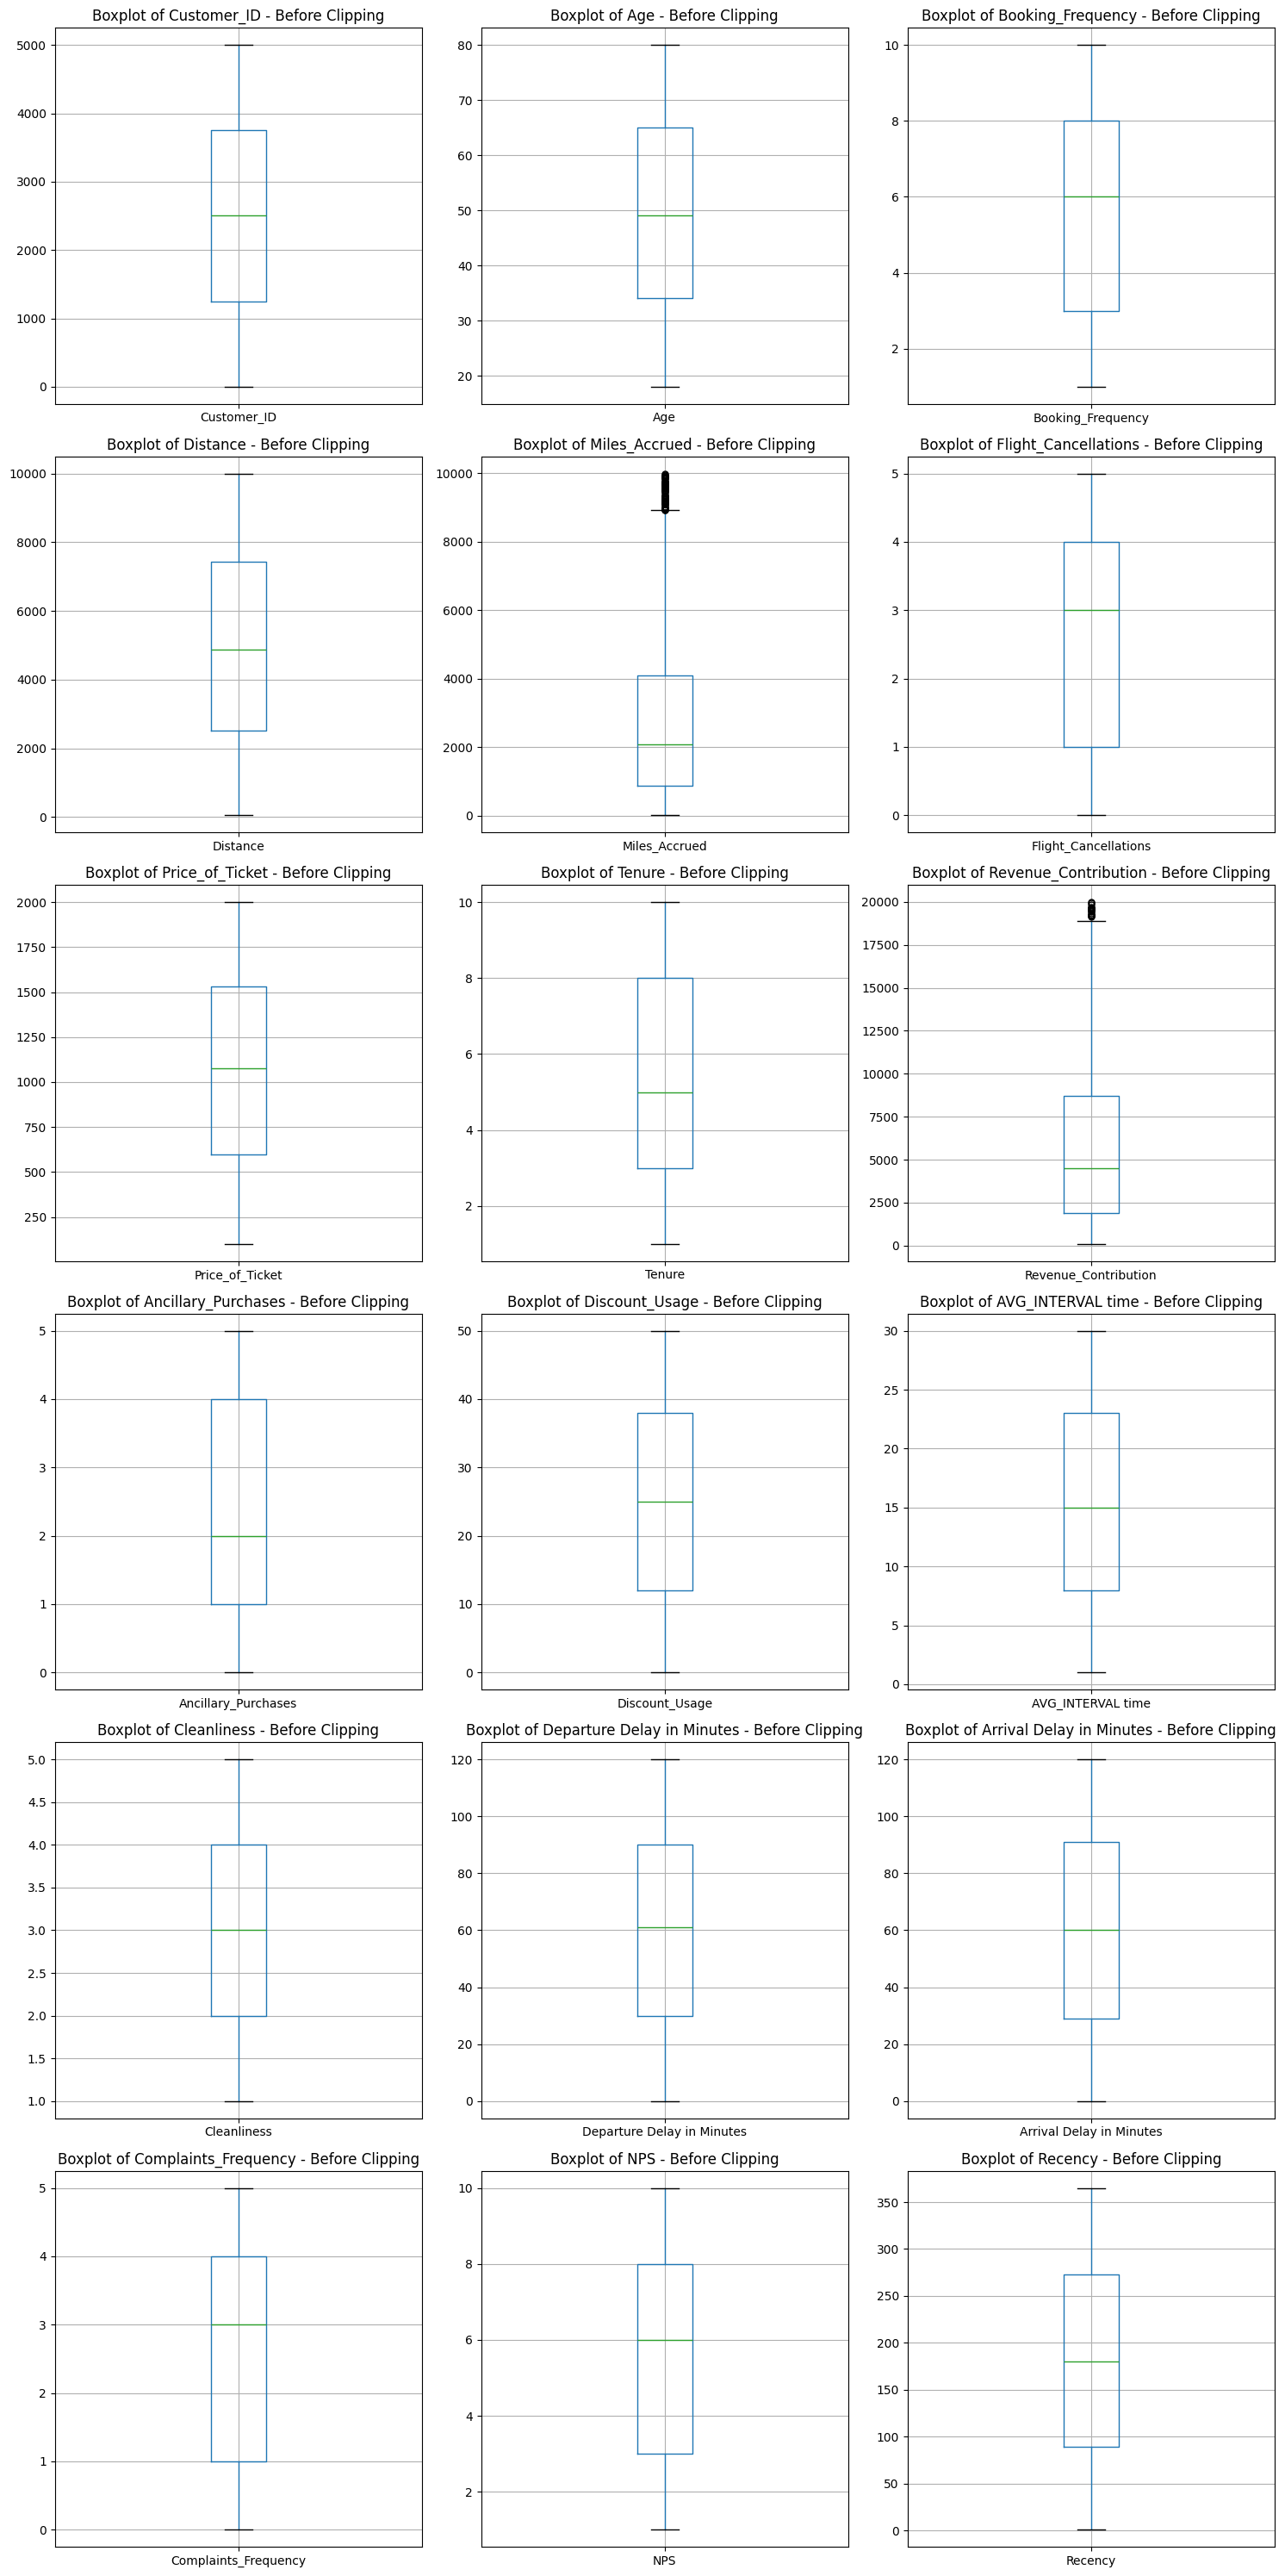

In [27]:
import matplotlib.pyplot as plt

# Set up a subplot grid: Adjust rows and columns based on the number of numerical columns
num_cols = len([col for col in airline_data.columns if airline_data[col].dtype in ['int64', 'float64']])
cols_per_row = 3  # Number of plots per row
rows = (num_cols // cols_per_row) + (1 if num_cols % cols_per_row != 0 else 0)

# Create the subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes to easily loop through

# Customize outlier color to red
flierprops = dict(marker='o', color='red', markersize=5)

# Plot each column's boxplot with outliers in red
col_idx = 0
for col in airline_data.select_dtypes(include=['int64', 'float64']).columns:
    ax = axes[col_idx]
    airline_data.boxplot(column=col, ax=ax, flierprops=flierprops)
    ax.set_title(f'Boxplot of {col} - Before Clipping')
    col_idx += 1

# Hide any unused subplots (if any)
for i in range(col_idx, len(axes)):
    axes[i].axis('off')

# Adjust layout for better presentation
plt.tight_layout()
plt.show()


# Univariable Analysis

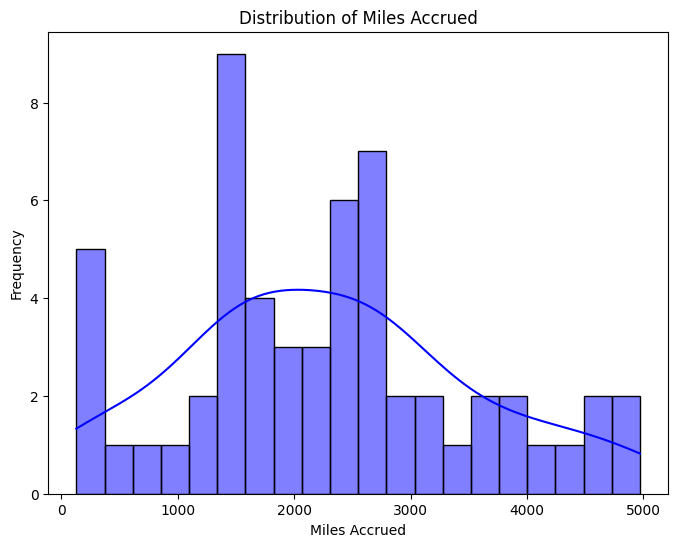

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for Miles_Accrued
miles_accrued = [128, 171, 235, 261, 311, 541, 627, 906, 1115, 1172, 1432, 1475, 1481, 1482, 1484, 1502, 1507, 1509, 1552, 1628, 1652, 1660, 1697, 1835, 1857, 1905, 2132, 2152, 2186, 2439, 2474, 2489, 2520, 2536, 2544, 2552, 2632, 2665, 2666, 2733, 2782, 2789, 2968, 3000, 3050, 3128, 3454, 3565, 3600, 3872, 3908, 4053, 4272, 4560, 4674, 4818, 4972]

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(miles_accrued, bins=20, kde=True, color='blue')
plt.title("Distribution of Miles Accrued")
plt.xlabel("Miles Accrued")
plt.ylabel("Frequency")
plt.show()


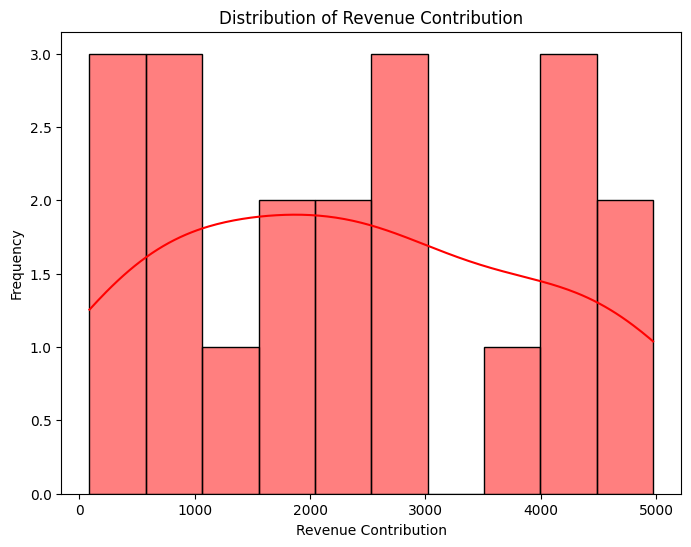

In [29]:
# Data for Revenue_Contribution
revenue_contribution = [90, 228, 322, 646, 984, 1023, 1307, 1904, 1993, 2064, 2520, 2687, 2810, 2894, 3709, 3997, 4357, 4446, 4904, 4971]

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(revenue_contribution, bins=10, kde=True, color='red')
plt.title("Distribution of Revenue Contribution")
plt.xlabel("Revenue Contribution")
plt.ylabel("Frequency")
plt.show()


# REMOVE outliers using IQR

Original Miles Accrued Data: 57 entries
Cleaned Miles Accrued Data: 57 entries
Original Revenue Contribution Data: 20 entries
Cleaned Revenue Contribution Data: 20 entries


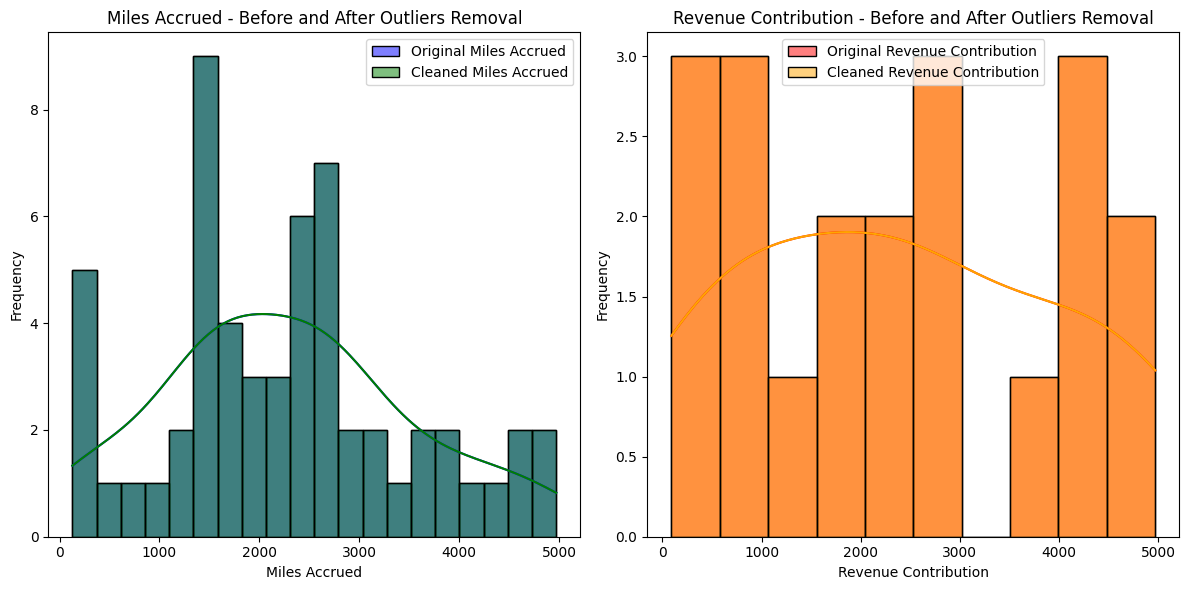

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for Miles_Accrued and Revenue_Contribution
miles_accrued = [128, 171, 235, 261, 311, 541, 627, 906, 1115, 1172, 1432, 1475, 1481, 1482, 1484, 1502, 1507, 1509, 1552, 1628, 1652, 1660, 1697, 1835, 1857, 1905, 2132, 2152, 2186, 2439, 2474, 2489, 2520, 2536, 2544, 2552, 2632, 2665, 2666, 2733, 2782, 2789, 2968, 3000, 3050, 3128, 3454, 3565, 3600, 3872, 3908, 4053, 4272, 4560, 4674, 4818, 4972]
revenue_contribution = [90, 228, 322, 646, 984, 1023, 1307, 1904, 1993, 2064, 2520, 2687, 2810, 2894, 3709, 3997, 4357, 4446, 4904, 4971]

# Convert to numpy arrays for easier manipulation
miles_accrued = np.array(miles_accrued)
revenue_contribution = np.array(revenue_contribution)

# Function to remove outliers using IQR method
def remove_outliers(data):
    # Calculate Q1 and Q3 (25th and 75th percentiles)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter data to remove outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    
    return filtered_data

# Remove outliers from both columns
cleaned_miles = remove_outliers(miles_accrued)
cleaned_revenue = remove_outliers(revenue_contribution)

# Print the results
print(f"Original Miles Accrued Data: {len(miles_accrued)} entries")
print(f"Cleaned Miles Accrued Data: {len(cleaned_miles)} entries")
print(f"Original Revenue Contribution Data: {len(revenue_contribution)} entries")
print(f"Cleaned Revenue Contribution Data: {len(cleaned_revenue)} entries")

# Plot before and after removing outliers
plt.figure(figsize=(12, 6))

# Plotting Miles Accrued - Before and After Outliers Removal
plt.subplot(1, 2, 1)
sns.histplot(miles_accrued, bins=20, kde=True, color='blue', label='Original Miles Accrued')
sns.histplot(cleaned_miles, bins=20, kde=True, color='green', label='Cleaned Miles Accrued')
plt.title("Miles Accrued - Before and After Outliers Removal")
plt.xlabel("Miles Accrued")
plt.ylabel("Frequency")
plt.legend()

# Plotting Revenue Contribution - Before and After Outliers Removal
plt.subplot(1, 2, 2)
sns.histplot(revenue_contribution, bins=10, kde=True, color='red', label='Original Revenue Contribution')
sns.histplot(cleaned_revenue, bins=10, kde=True, color='orange', label='Cleaned Revenue Contribution')
plt.title("Revenue Contribution - Before and After Outliers Removal")
plt.xlabel("Revenue Contribution")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()  # Ensures the plots are nicely spaced
plt.show()


# Multivariable Analysis

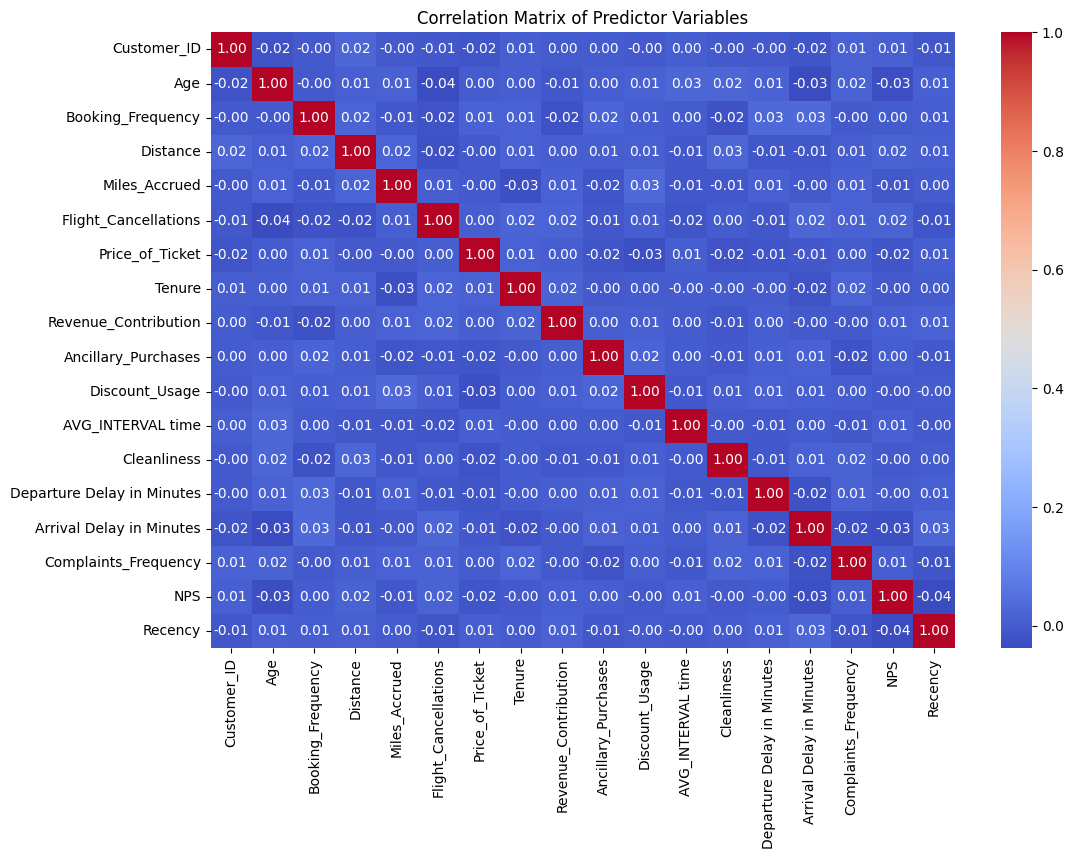

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'data' with your DataFrame if it's named differently
# Assuming 'data' contains only the numerical columns

# If necessary, you can select only numerical columns like this:
X = airline_data.select_dtypes(include=['float64', 'int64'])

# Visualize the correlation matrix of predictor variables
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Predictor Variables')
plt.show()


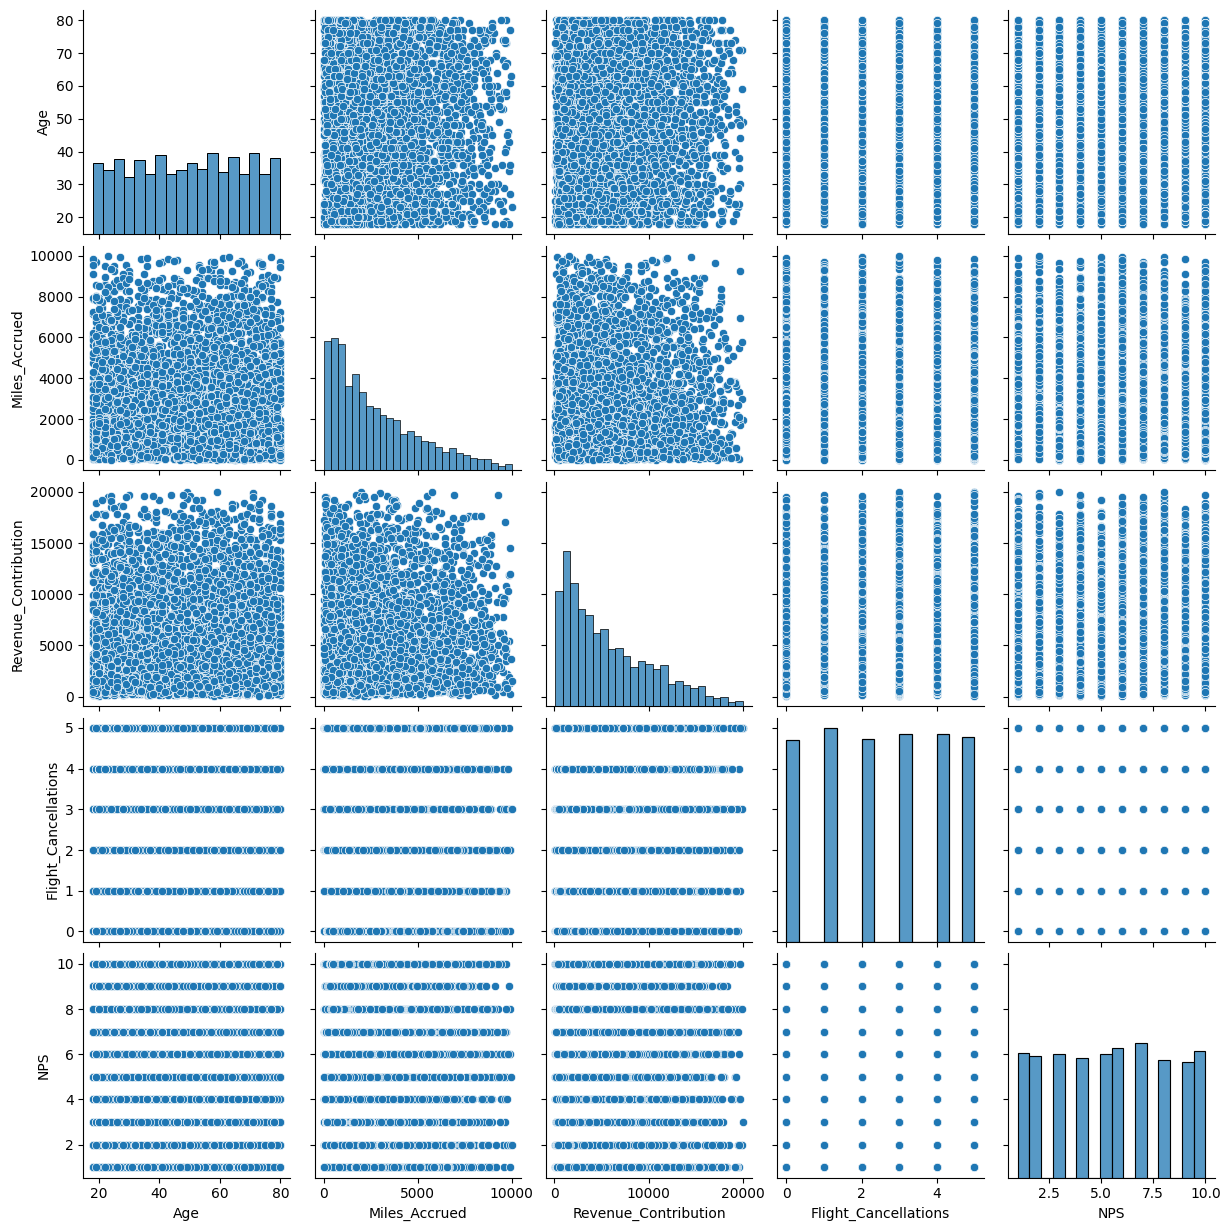

In [32]:
# Pair plot for selected variables to explore relationships
sns.pairplot(airline_data[['Age', 'Miles_Accrued', 'Revenue_Contribution', 'Flight_Cancellations', 'NPS']])
plt.show()


# **Customer Satisfaction Prediction**

 ### Encoding 

In [33]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply to multiple columns
categorical_columns = ['Gender', 'Offer', 'Preferred_Travel_Class', 'Booking_Channel', 'Destination_Type', 'Loyalty_Tier']
for col in categorical_columns:
    airline_data[col] = label_encoder.fit_transform(airline_data[col])

In [34]:
# Create target variable 'Satisfaction' based on 'NPS'
airline_data['Satisfaction'] = (airline_data['NPS'] > 7).astype(int)

In [35]:
airline_data.head()

,Customer_ID,Age,Gender,Preferred_Travel_Class,Booking_Channel,Destination_Type,Booking_Frequency,Distance,Miles_Accrued,Loyalty_Tier,...,Checkin service,Inflight service,AVG_INTERVAL time,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Complaints_Frequency,NPS,Recency,Satisfaction
0,1,31,1,1,2,0,8,3783,6095,1,...,3,4,16,1,36,22,1,4,17,0
1,2,74,0,2,3,1,9,4752,1918,1,...,5,2,26,1,66,89,3,2,202,0
2,3,54,1,0,0,1,2,5193,5665,0,...,5,3,11,4,103,12,1,9,324,1
3,4,62,0,1,2,0,7,6423,682,1,...,3,4,30,5,30,52,1,2,99,0
4,5,34,0,1,3,0,2,8807,1540,1,...,3,3,16,1,11,50,0,8,289,1


In [36]:
X = airline_data.drop(['NPS', 'Satisfaction', 'Customer_ID'], axis=1)
y = airline_data['Satisfaction']


In [37]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### RandomForestClassifier

In [38]:
# Model Training with RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82       702
           1       0.00      0.00      0.00       298

    accuracy                           0.70      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.49      0.70      0.58      1000



In [40]:
print(airline_data.columns)


Index(['Customer_ID', 'Age', 'Gender', 'Preferred_Travel_Class',
       'Booking_Channel', 'Destination_Type', 'Booking_Frequency', 'Distance',
       'Miles_Accrued', 'Loyalty_Tier', 'Flight_Cancellations',
       'Price_of_Ticket', 'Tenure', 'Revenue_Contribution',
       'Ancillary_Purchases', 'Discount_Usage', 'Offer',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'AVG_INTERVAL time', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Complaints_Frequency', 'NPS', 'Recency', 'Satisfaction'],
      dtype='object')


In [41]:
# Create a churn column based on recency
airline_data['Churn'] = airline_data['Recency'].apply(lambda x: 1 if x > 145 else 0)

# Example threshold: if recency is greater than a certain value (e.g., 30 days), mark as churned


0 (non-churn) and 1 (churn):

In [42]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into features (X) and target (y)
X = airline_data.drop(columns='Churn')
y = airline_data['Churn']

# Stratified split to ensure both classes are represented in both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the distribution of the target variable in the split
print("Class distribution in the training set:")
print(y_train.value_counts())

# Scale the features (Optional but recommended for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression classifier
logreg = LogisticRegression()

# Train Logistic Regression model
logreg.fit(X_train_scaled, y_train)

# Make predictions
logreg_preds = logreg.predict(X_test_scaled)

# Evaluate Logistic Regression model
def evaluate_model(model_name, y_true, y_preds):
    print(f"{model_name} Classification Report:")
    print(classification_report(y_true, y_preds))
    print(f"{model_name} Confusion Matrix:")
    print(confusion_matrix(y_true, y_preds))
    print(f"{model_name} Accuracy: {accuracy_score(y_true, y_preds)}\n")

# Evaluate only Logistic Regression
evaluate_model("Logistic Regression", y_test, logreg_preds)


Class distribution in the training set:
Churn
1    2087
0    1413
Name: count, dtype: int64
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       606
           1       0.99      0.99      0.99       894

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500

Logistic Regression Confusion Matrix:
[[597   9]
 [  5 889]]
Logistic Regression Accuracy: 0.9906666666666667



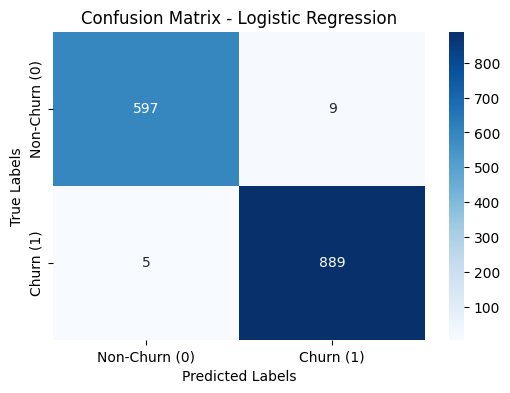

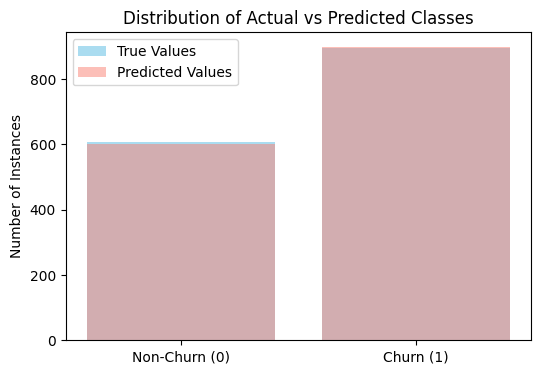

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, logreg_preds)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Churn (0)', 'Churn (1)'], yticklabels=['Non-Churn (0)', 'Churn (1)'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot the distribution of actual vs predicted classes (0 means non-churn, 1 means churn)
plt.figure(figsize=(6, 4))
plt.bar(['Non-Churn (0)', 'Churn (1)'], [sum(y_test == 0), sum(y_test == 1)], color='skyblue', alpha=0.7, label='True Values')
plt.bar(['Non-Churn (0)', 'Churn (1)'], [sum(logreg_preds == 0), sum(logreg_preds == 1)], color='salmon', alpha=0.5, label='Predicted Values')
plt.title("Distribution of Actual vs Predicted Classes")
plt.ylabel("Number of Instances")
plt.legend()
plt.show()


In [44]:
airline_data.head()

,Customer_ID,Age,Gender,Preferred_Travel_Class,Booking_Channel,Destination_Type,Booking_Frequency,Distance,Miles_Accrued,Loyalty_Tier,...,Inflight service,AVG_INTERVAL time,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Complaints_Frequency,NPS,Recency,Satisfaction,Churn
0,1,31,1,1,2,0,8,3783,6095,1,...,4,16,1,36,22,1,4,17,0,0
1,2,74,0,2,3,1,9,4752,1918,1,...,2,26,1,66,89,3,2,202,0,1
2,3,54,1,0,0,1,2,5193,5665,0,...,3,11,4,103,12,1,9,324,1,1
3,4,62,0,1,2,0,7,6423,682,1,...,4,30,5,30,52,1,2,99,0,0
4,5,34,0,1,3,0,2,8807,1540,1,...,3,16,1,11,50,0,8,289,1,1


# Pie Chart for Churn Distribution

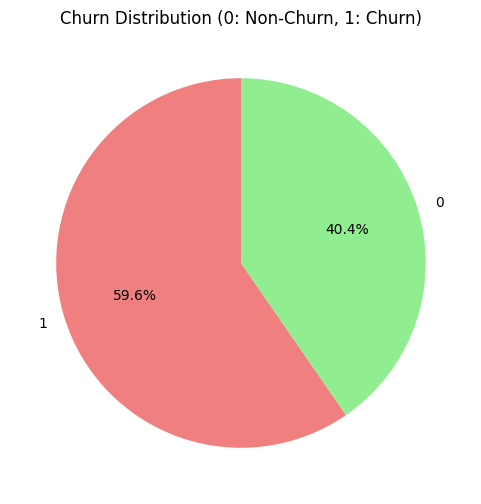

In [45]:
# Pie chart to show churn distribution
churn_distribution = airline_data['Churn'].value_counts()
churn_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'], figsize=(6, 6))
plt.title("Churn Distribution (0: Non-Churn, 1: Churn)")
plt.ylabel('')
plt.show()



# Pairplot to Explore Feature Relationships

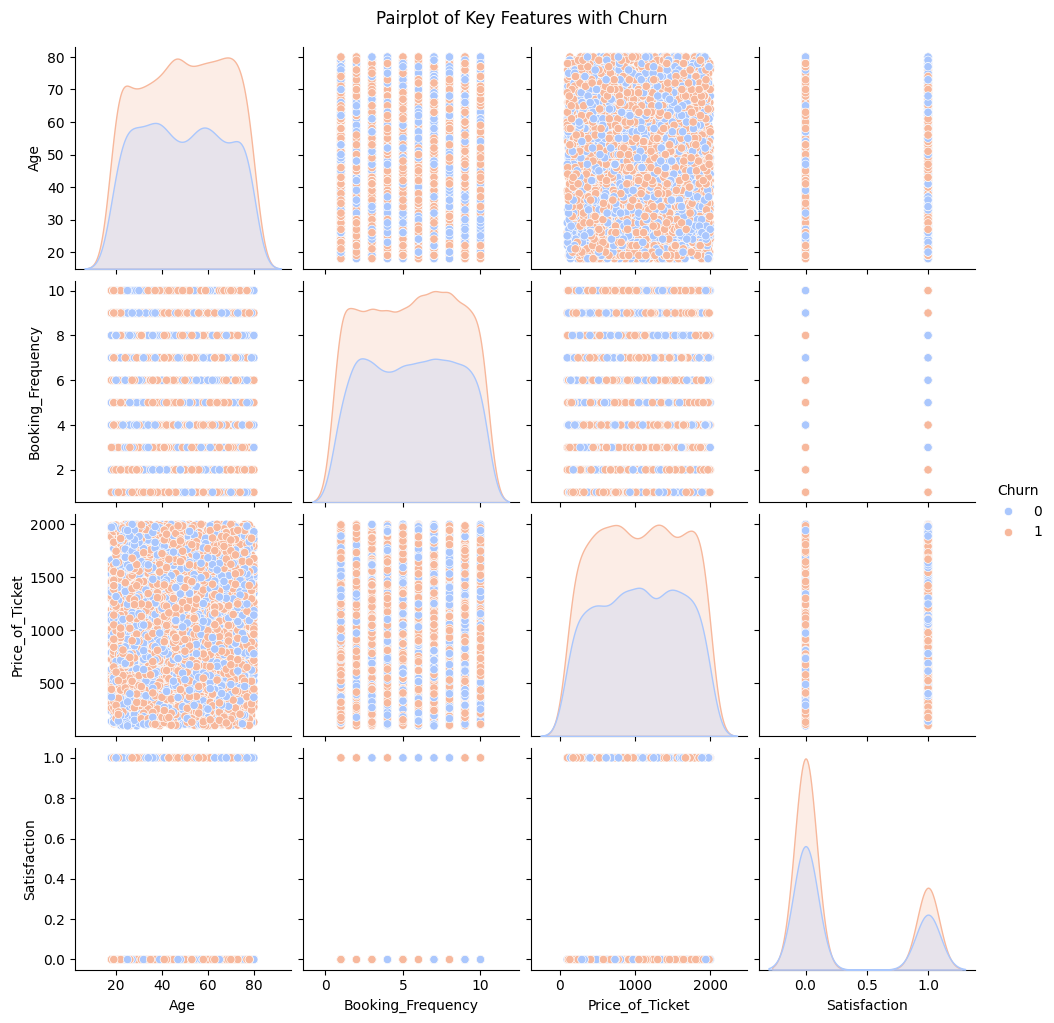

In [46]:
import seaborn as sns

# Plot pairplot to explore relationships between features
sns.pairplot(airline_data[['Age', 'Booking_Frequency', 'Price_of_Ticket', 'Satisfaction', 'Churn']], hue='Churn', palette='coolwarm')
plt.suptitle("Pairplot of Key Features with Churn", y=1.02)
plt.show()


# Stacked Bar Chart for Churn and Loyalty_Tier

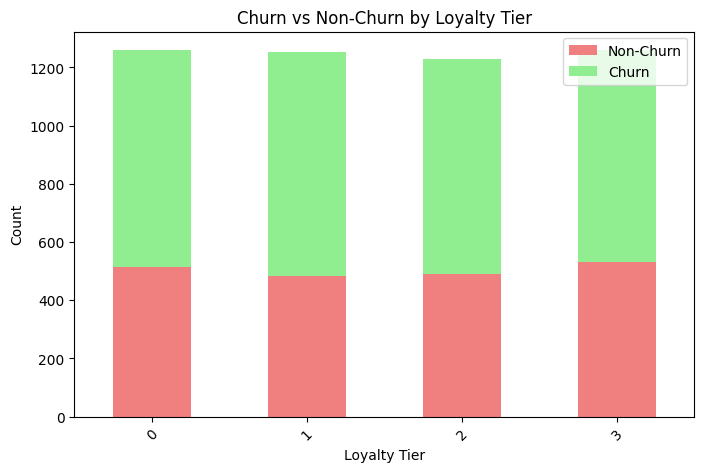

In [47]:
# Stacked bar chart to show churn vs non-churn across different loyalty tiers
loyalty_churn = pd.crosstab(airline_data['Loyalty_Tier'], airline_data['Churn'])
loyalty_churn.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'], figsize=(8, 5))
plt.title("Churn vs Non-Churn by Loyalty Tier")
plt.xlabel("Loyalty Tier")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(['Non-Churn', 'Churn'])
plt.show()


# Heatmap of Churn by Inflight wifi service, Seat comfort, and Inflight entertainment

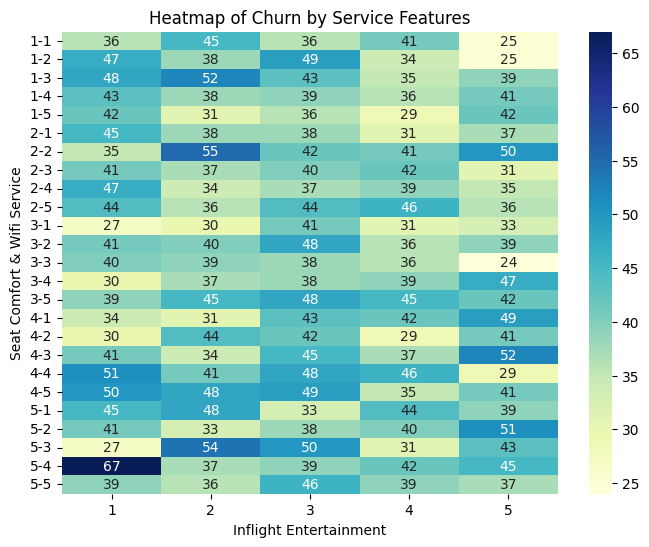

In [48]:
# Heatmap to analyze churn by multiple features
heatmap_data = airline_data[['Inflight wifi service', 'Seat comfort', 'Inflight entertainment', 'Churn']].groupby(['Inflight wifi service', 'Seat comfort', 'Inflight entertainment']).size().unstack(fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Churn by Service Features")
plt.xlabel("Inflight Entertainment")
plt.ylabel("Seat Comfort & Wifi Service")
plt.show()


# Bar Plot for Complaints_Frequency vs Churn && Count Plot for Gender && ChurnCount Plot for Preferred_Travel_Class and Churn

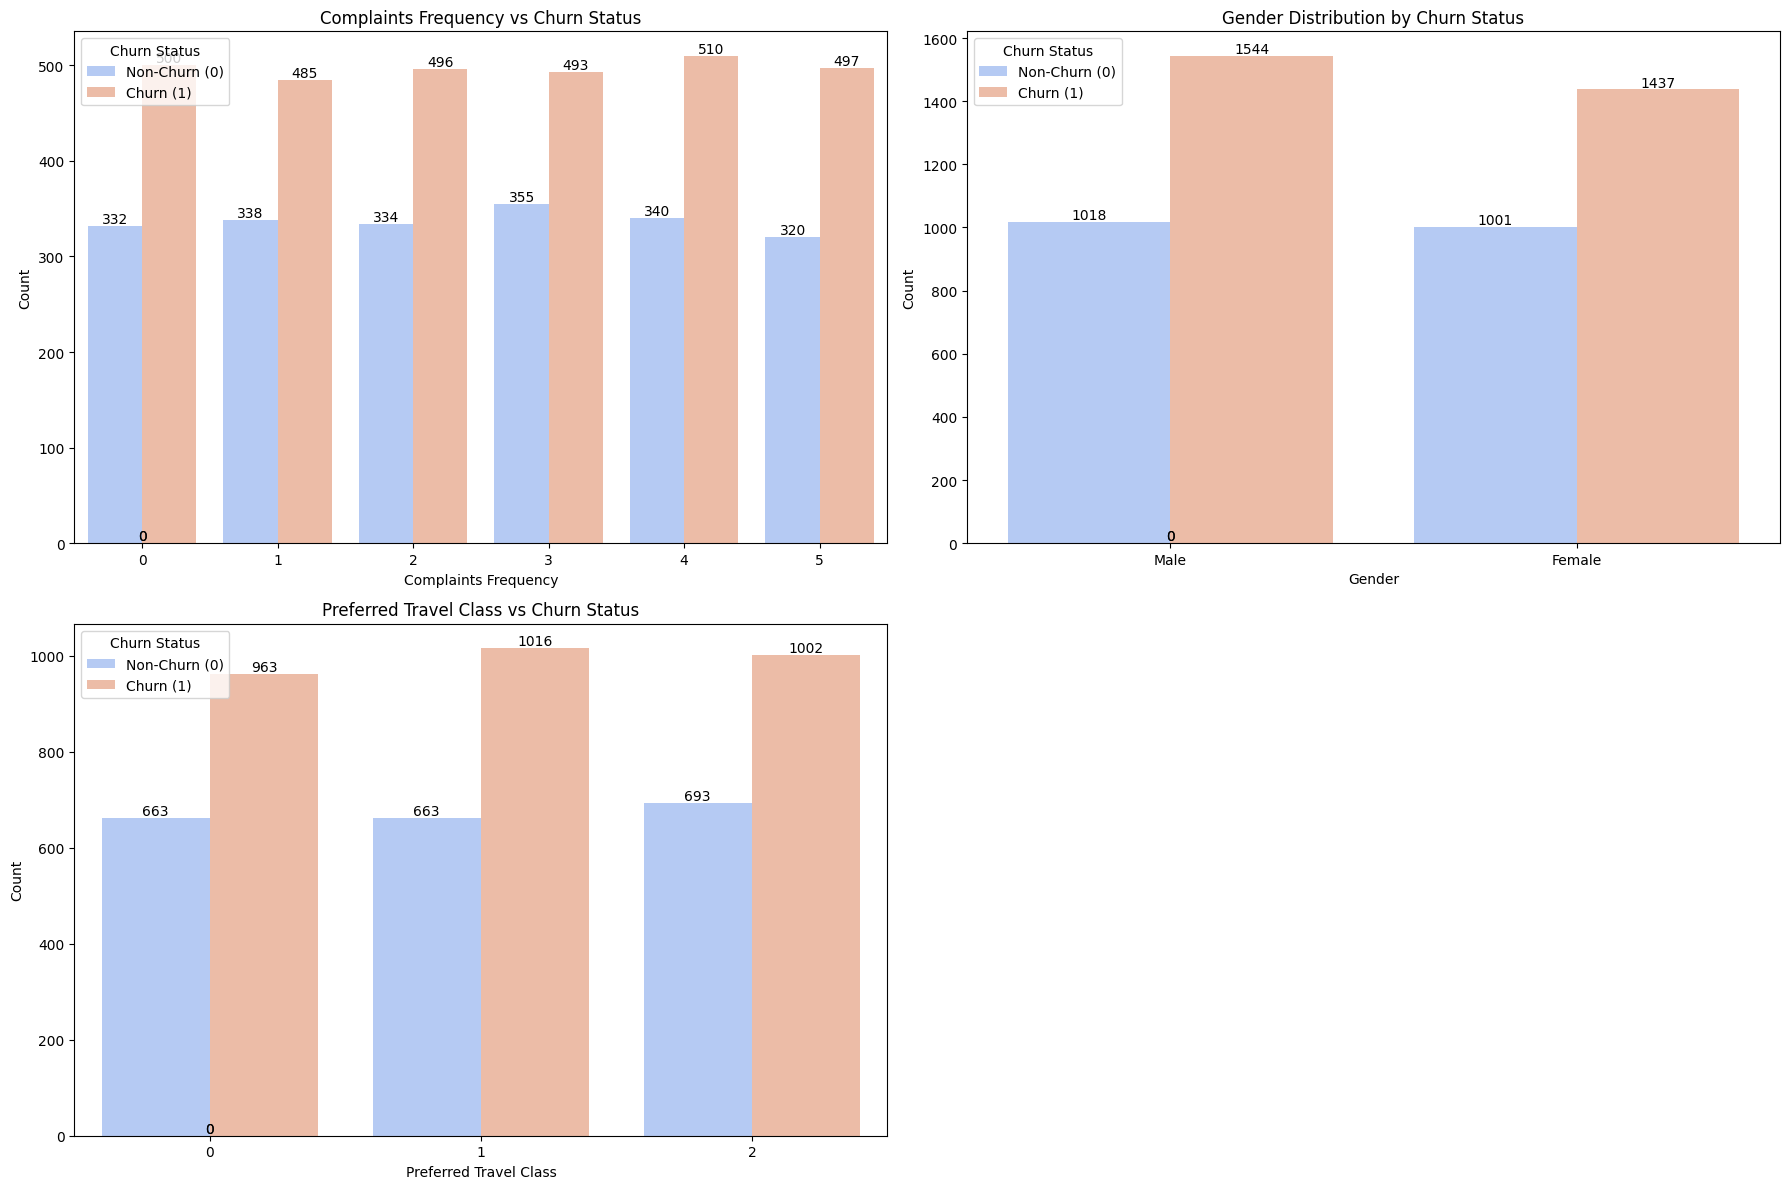

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot grid
plt.figure(figsize=(18, 12))

# 1. Complaints_Frequency vs Churn
plt.subplot(2, 2, 1)
ax1 = sns.countplot(data=airline_data, x='Complaints_Frequency', hue='Churn', palette='coolwarm')
plt.title("Complaints Frequency vs Churn Status")
plt.xlabel("Complaints Frequency")
plt.ylabel("Count")
plt.legend(title="Churn Status", labels=["Non-Churn (0)", "Churn (1)"])

# Add value labels to each bar
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', fontsize=10, color='black', 
                 xytext=(0, 5), textcoords='offset points')

# 2. Gender vs Churn (Bar plot)
plt.subplot(2, 2, 2)
ax2 = sns.countplot(data=airline_data, x='Gender', hue='Churn', palette='coolwarm')
plt.title("Gender Distribution by Churn Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])  # Make gender labels more readable
plt.legend(title="Churn Status", labels=["Non-Churn (0)", "Churn (1)"])

# Add value labels to each bar
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', fontsize=10, color='black', 
                 xytext=(0, 5), textcoords='offset points')

# 3. Preferred_Travel_Class vs Churn
plt.subplot(2, 2, 3)
ax3 = sns.countplot(data=airline_data, x='Preferred_Travel_Class', hue='Churn', palette='coolwarm')
plt.title("Preferred Travel Class vs Churn Status")
plt.xlabel("Preferred Travel Class")
plt.ylabel("Count")
plt.legend(title="Churn Status", labels=["Non-Churn (0)", "Churn (1)"])

# Add value labels to each bar
for p in ax3.patches:
    ax3.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', fontsize=10, color='black', 
                 xytext=(0, 5), textcoords='offset points')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()
